<a href="https://colab.research.google.com/github/hlcubiot/Hannah-work/blob/main/DSC609_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSC609 Final Project:


---


Hannah Cubiotti



## Packages:

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib import pyplot
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## Data:

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1-O71Dx3kpRCA1lK-HLnoh4kIgnSbEpAn'})
downloaded.GetContentFile('winequality-red.csv')

In [ ]:
data = pd.read_csv("winequality-red.csv")

## Data Preprocessing and Exploratory Data Analysis:

In [ ]:
data.isnull().sum()                       # no null values found

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.info()                               # all data values are integer or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


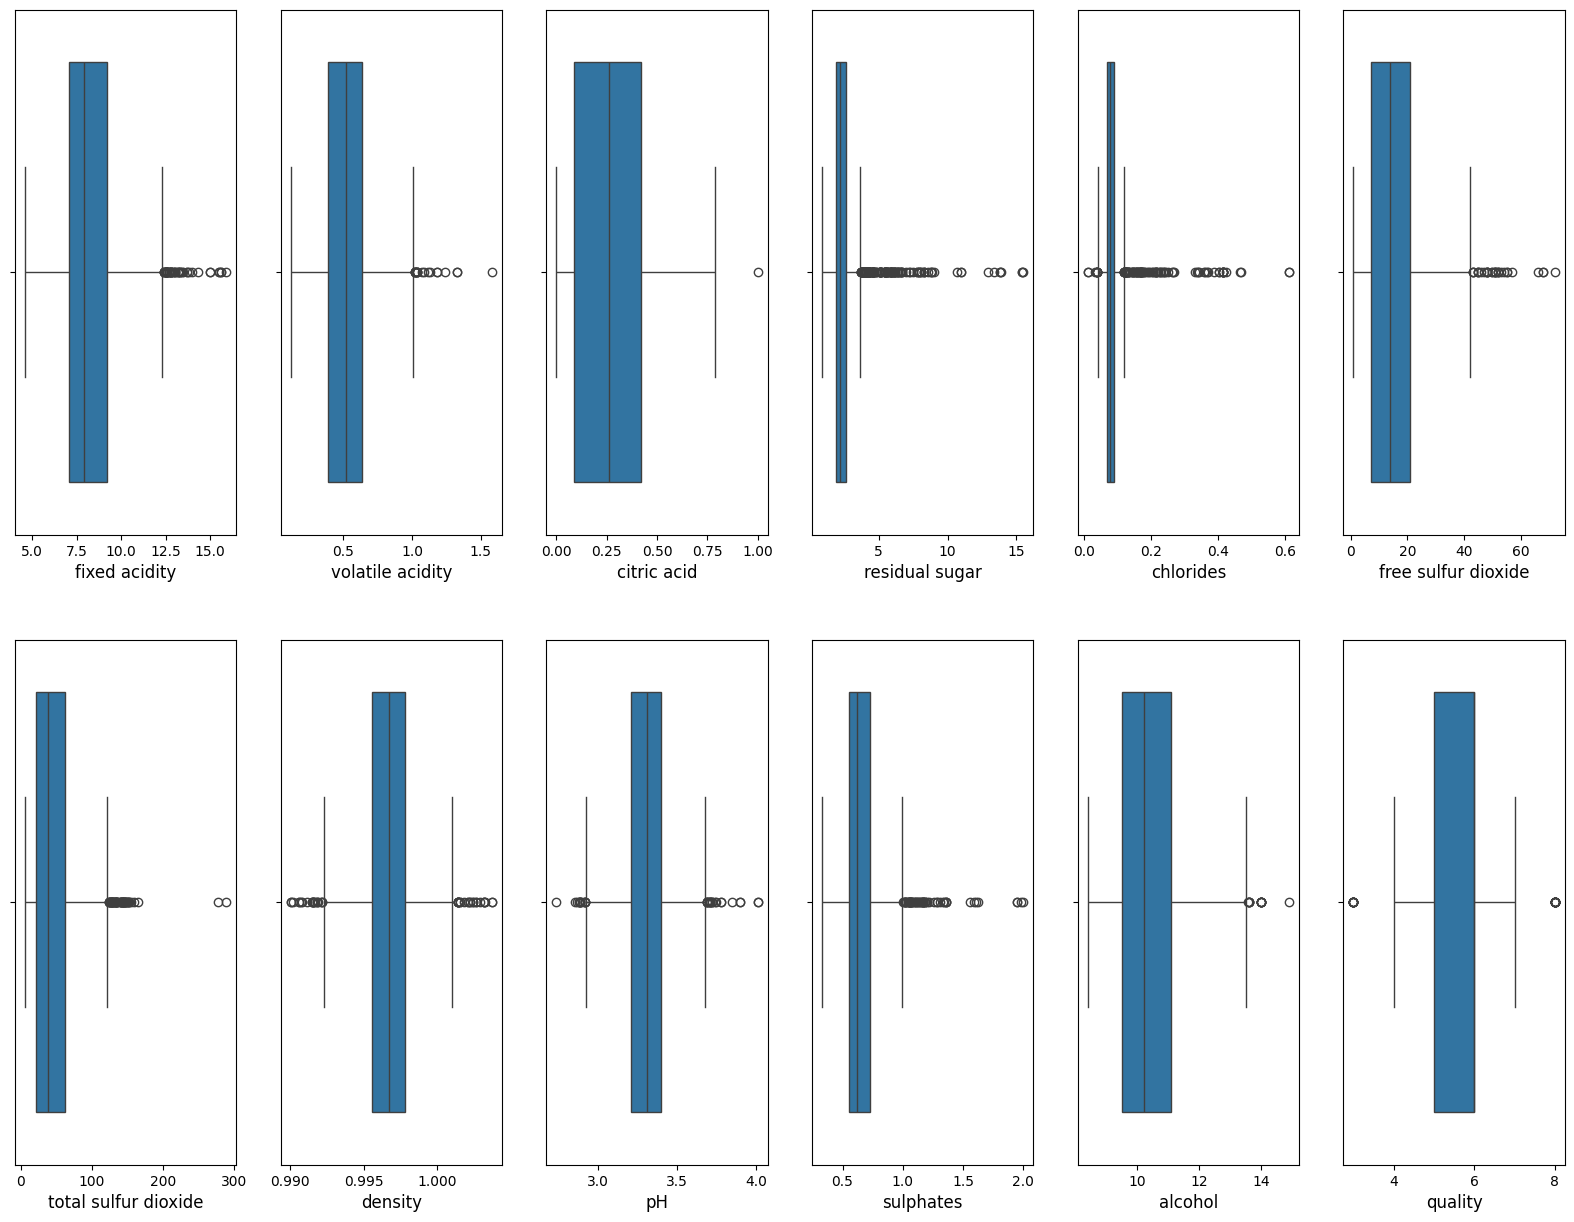

In [ ]:
plt.figure(figsize = (20, 15))                # checking for outliers in dataset
for i in range (len(data.columns)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(x = data.iloc[:, i])
    plt.xlabel(data.columns[i], size = 12)

In [ ]:
# Train, Test, and Split Data
X = data.drop(["quality"], axis = 1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

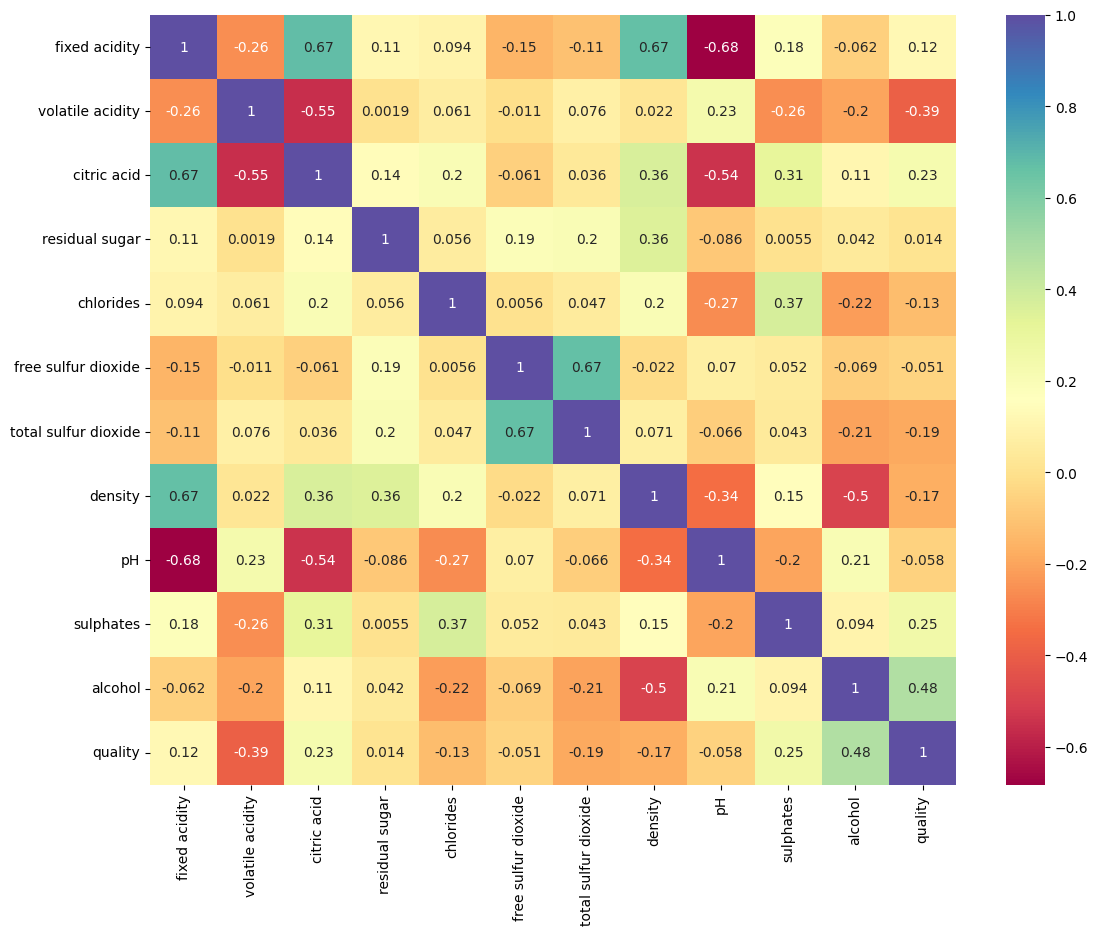

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

## Models:

- Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
Y_pred = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred)
print("Random Forest Classifier accuracy is:", accuracy_forest)

Random Forest Classifier accuracy is: 0.6875


- Logistic Regression

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, lr_predictions)
cnf_matrix

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   9,   4,   0,   0],
       [  0,   0, 118,  46,   0,   0],
       [  0,   0,  67, 100,   2,   0],
       [  0,   0,   4,  43,   1,   0],
       [  0,   0,   0,   5,   0,   0]])

In [ ]:
accuracy = accuracy_score(y_test, lr_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5475


- Gradient Boosting

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=150, learning_rate=.2)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=150,
                           random_state=0)

In [ ]:
pred_y = gbrt.predict(X_test)
acc_gbrt = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc_gbrt))

Gradient Boosting Classifier accuracy is : 0.59


- MLP Classifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=.02,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 1.89589565
Iteration 2, loss = 1.31937419
Iteration 3, loss = 1.23152149
Iteration 4, loss = 1.19302254
Iteration 5, loss = 1.21853429
Iteration 6, loss = 1.17394215
Iteration 7, loss = 1.15980719
Iteration 8, loss = 1.14617252
Iteration 9, loss = 1.14247223
Iteration 10, loss = 1.13729021
Iteration 11, loss = 1.13061345
Iteration 12, loss = 1.12522972
Iteration 13, loss = 1.11712514
Iteration 14, loss = 1.10964575
Iteration 15, loss = 1.10933054
Iteration 16, loss = 1.10154126
Iteration 17, loss = 1.09805963
Iteration 18, loss = 1.10350581
Iteration 19, loss = 1.10178784
Iteration 20, loss = 1.09454704
Iteration 21, loss = 1.08162024
Iteration 22, loss = 1.08158379
Iteration 23, loss = 1.08701547
Iteration 24, loss = 1.07572741
Iteration 25, loss = 1.08280321
Iteration 26, loss = 1.06976155
Iteration 27, loss = 1.07276668
Iteration 28, loss = 1.06071439
Iteration 29, loss = 1.06363530
Iteration 30, loss = 1.06382917
Iteration 31, loss = 1.05837369
Iteration 32, los

In [ ]:
accuracy_score(y_test, y_pred)

0.5625

In [ ]:
 %%shell
jupyter nbconvert --to html /content/DSC609_Final_Project.ipynb

[NbConvertApp] Converting notebook /content/DSC609_Final_Project.ipynb to html
[NbConvertApp] Writing 887491 bytes to /content/DSC609_Final_Project.html
